In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Donner Party Expedition 

The Donner dataset records details about the Donner Party, a group that tried to migrate to California in 1846. An early blizzard trapped them in the Sierra Nevada, and almost half died before rescue.

![Donner](donner.jpg)

In [1]:
# load data
df= pd.read_csv('DonnerData.csv',index_col='name',parse_dates=True)
df.head()

C:\Users\javier.perez-alvaro\AppData\Local\Temp\ipykernel_41068\714343420.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('DonnerData.csv',index_col='name',parse_dates=True)


,family,age,sex,survived,death
name,,,,,
Antoine,Other,23,Male,0,1846-12-29
Breen_Edward,Breen,13,Male,1,NaN
Breen_Margaret_I,Breen,1,Female,1,NaN
Breen_James,Breen,5,Male,1,NaN
Breen_John,Breen,14,Male,1,NaN


Your goal is to train a decision tree to predict `death` based on the columns `family`, `age`, and `sex`.

In [15]:
X = data[['family','age','sex']]
y = data.survived

In [16]:
X.head()

,family,age,sex
name,,,
Antoine,Other,23,Male
Breen_Edward,Breen,13,Male
Breen_Margaret_I,Breen,1,Female
Breen_James,Breen,5,Male
Breen_John,Breen,14,Male


In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_validate, ShuffleSplit

In [20]:
# preprocessing transformer
preprocessing = ColumnTransformer(transformers=[
    ('numerical', StandardScaler(), ['age']),
    ('nomimal', OneHotEncoder(handle_unknown='ignore'), ['family','sex'])
])

## knn classifier

In [31]:
# pipeline
pipe = Pipeline(steps=[
    ('pre', preprocessing),
    ('clf', KNeighborsClassifier(n_neighbors=10))
])

In [32]:
cv = ShuffleSplit(n_splits=30, test_size=0.2)
cv_results = cross_validate(pipe, X, y, 
                            cv=cv,
                            return_train_score=True,
                            scoring='accuracy',)

In [33]:
# put results into a dataframe
cv_results = pd.DataFrame(cv_results)
scores = pd.DataFrame()
scores[["train error", "test error"]] = cv_results[["train_score", "test_score"]]
scores.head()

,train error,test error
0,0.750000,0.666667
1,0.777778,0.722222
2,0.736111,0.722222
3,0.722222,0.611111
4,0.736111,0.555556


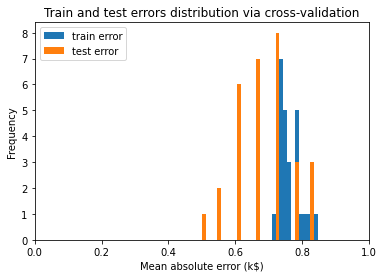

In [34]:
scores.plot.hist(bins=30)
plt.xlabel("Mean absolute error (k$)")
plt.xlim([0,1])
_ = plt.title("Train and test errors distribution via cross-validation")

## Logistic Regression Classifier

In [35]:
# pipeline
pipe = Pipeline(steps=[
    ('pre', preprocessing),
    ('clf', LogisticRegression())
])

In [40]:
cv = ShuffleSplit(n_splits=30, test_size=0.3)
cv_results = cross_validate(pipe, X, y, 
                            cv=cv,
                            return_train_score=True,
                            scoring='accuracy',)

In [41]:
# put results into a dataframe
cv_results = pd.DataFrame(cv_results)
scores = pd.DataFrame()
scores[["train error", "test error"]] = cv_results[["train_score", "test_score"]]
scores.head()

,train error,test error
0,0.761905,0.666667
1,0.777778,0.777778
2,0.761905,0.629630
3,0.730159,0.740741
4,0.777778,0.703704


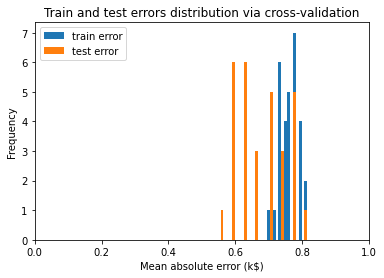

In [42]:
scores.plot.hist(bins=30)
plt.xlabel("Mean absolute error (k$)")
plt.xlim([0,1])
_ = plt.title("Train and test errors distribution via cross-validation")

## Decision Tree Classifier

In [46]:
# pipeline
pipe = Pipeline(steps=[
    ('pre', preprocessing),
    ('clf', DecisionTreeClassifier(max_depth=2))
])

In [47]:
cv = ShuffleSplit(n_splits=30, test_size=0.3)
cv_results = cross_validate(pipe, X, y, 
                            cv=cv,
                            return_train_score=True,
                            scoring='accuracy',)

In [48]:
# put results into a dataframe
cv_results = pd.DataFrame(cv_results)
scores = pd.DataFrame()
scores[["train error", "test error"]] = cv_results[["train_score", "test_score"]]
scores.head()

,train error,test error
0,0.777778,0.592593
1,0.793651,0.518519
2,0.793651,0.592593
3,0.761905,0.592593
4,0.761905,0.629630


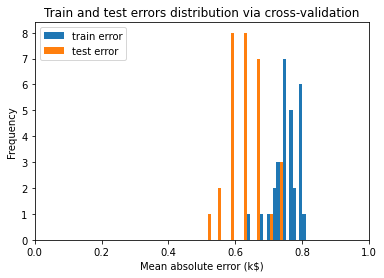

In [49]:
scores.plot.hist(bins=30)
plt.xlabel("Mean absolute error (k$)")
plt.xlim([0,1])
_ = plt.title("Train and test errors distribution via cross-validation")